In [1]:
%matplotlib inline

import h5py, os
import numpy as np
from matplotlib import pyplot as plt

# 1. Data Loading

Load the training data.

In [2]:
file_path = '/home/kevinxu/Documents/NC2019MRI/train'
num_samples = 0


for num_samples, fname in enumerate(sorted(os.listdir(file_path))):
	subject_path = os.path.join(file_path, fname)
	with h5py.File(subject_path, 'a') as hf:
		print(f'The No {num_samples+1} file {fname} key is {list(hf.keys())}.')
# for fname in sorted(os.listdir(file_path)):
#     subject_path = os.path.join(file_path, fname)
#     num_samples += 1
#     with h5py.File(subject_path, "a") as hf:
#         print(f'file {fname} key is {list(hf.keys())}')

# print(f'The number of samples is {num_samples}. \n')

The No 1 file file1000000.h5 key is ['kspace'].
The No 2 file file1000007.h5 key is ['kspace'].
The No 3 file file1000017.h5 key is ['kspace'].
The No 4 file file1000026.h5 key is ['kspace'].
The No 5 file file1000031.h5 key is ['kspace'].
The No 6 file file1000033.h5 key is ['kspace'].
The No 7 file file1000041.h5 key is ['kspace'].
The No 8 file file1000052.h5 key is ['kspace'].
The No 9 file file1000071.h5 key is ['kspace'].
The No 10 file file1000073.h5 key is ['kspace'].
The No 11 file file1000107.h5 key is ['kspace'].
The No 12 file file1000108.h5 key is ['kspace'].
The No 13 file file1000114.h5 key is ['kspace'].
The No 14 file file1000126.h5 key is ['kspace'].
The No 15 file file1000153.h5 key is ['kspace'].
The No 16 file file1000178.h5 key is ['kspace'].
The No 17 file file1000182.h5 key is ['kspace'].
The No 18 file file1000190.h5 key is ['kspace'].
The No 19 file file1000196.h5 key is ['kspace'].
The No 20 file file1000201.h5 key is ['kspace'].
The No 21 file file1000206.h5

In [3]:
sample_path = '/home/kevinxu/Documents/NC2019MRI/train/file1000000.h5'

with h5py.File(sample_path,  "r") as hf:      # Read-only
    volume_kspace = hf['kspace'][()]
    print('shape:', volume_kspace.shape)
    print('dtye:', volume_kspace.dtype)
    print('sum:', volume_kspace.sum())
    print('mean:', volume_kspace.mean())
    print('std:', volume_kspace.std())

shape: (35, 640, 368)
dtye: complex64
sum: (0.5325656-0.006377424j)
mean: (6.460666e-08-7.736588e-10j)
std: 2.3764129e-05


In [4]:
def show_slices(data, slice_nums, cmap=None):
    fig = plt.figure(figsize=(15,10))
    for i, num in enumerate(slice_nums):
        plt.subplot(1, len(slice_nums), i + 1)
        plt.imshow(data[num], cmap=cmap)
        plt.axis('off')

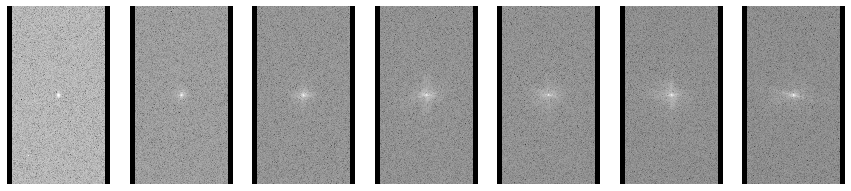

In [5]:
show_slices(np.log(np.abs(volume_kspace) + 1e-9), [0, 5, 10, 15, 20, 25, 30], cmap='gray')

In [6]:
from functions import transforms as T

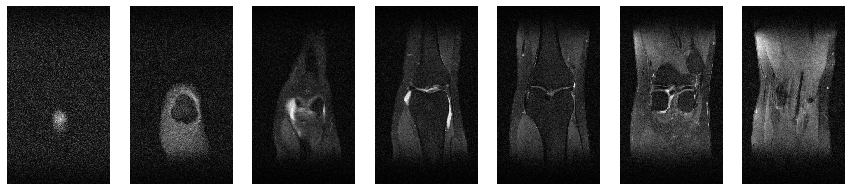

In [7]:
volume_kspace2 = T.to_tensor(volume_kspace)
volume_image = T.ifft2(volume_kspace2)
volume_image_abs = T.complex_abs(volume_image)

show_slices(volume_image_abs, [0, 5, 10, 15, 20, 25, 30], cmap='gray')

In [8]:
import torch
from functions.subsample import MaskFunc

mask_func0 = MaskFunc(center_fractions=[0.08], accelerations=[4])
mask_func1 = MaskFunc(center_fractions=[0.04], accelerations=[8])

In [11]:
shape_ = np.array(volume_kspace.shape)    # shape of original kspace
shape = np.array(volume_kspace2.shape)    # shape of real image
print(shape_)
print(shape)


[ 35 640 368]
[ 35 640 368   2]


In [18]:
mask0.shape

torch.Size([1, 1, 368, 1])

In [13]:
shape = np.array(volume_kspace2.shape)

mask0 = mask_func0(shape, seed=0)
mask1 = mask_func1(shape, seed=0)

masked_kspace0 = torch.where(mask0 == 0, torch.Tensor([0]), volume_kspace2)
masked_kspace1 = torch.where(mask1 == 0, torch.Tensor([0]), volume_kspace2)

S_Num, Ny, Nx, _ = volume_kspace2.shape